#Dataset desc

INFO: <br>
Terkait tugas besar, diperbolehkan menggunakan library misal random forest (utk bagging), AdaBoost (utk boosting).
Namun bagi yang sudah terlanjur mengerjakan tanpa library, nanti akan mendapat bonus nilai.

#Import dataset

In [ ]:
# Import Lib.

import numpy as np
import pandas as pd
import seaborn as sns
import random as rndm
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from IPython.display import clear_output
from sklearn.impute import KNNImputer
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Import dataset "autos_mpg.csv" (main dataset)

!gdown --id 1JYTII7CJrNJlxzeLQkmEhyw0ud5GCIdi

dataFrame = pd.read_csv("autos_mpg.csv")
dataFrame

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JYTII7CJrNJlxzeLQkmEhyw0ud5GCIdi
To: /content/autos_mpg.csv
100% 18.1k/18.1k [00:00<00:00, 19.5MB/s]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# Import informasi dataset "attribute_information.csv" (information dataset)

!gdown --id 1W8NZXusmtGi6za9hKJ2uewVThcDTbL1R

dataInfo = pd.read_csv("attribute_information.csv")

print("\nINFORMASI DATA SET\n")

for i in range(len(dataInfo["ColumnName"])):
  if (dataInfo["ColumnName"][i] == "mpg") or (dataInfo["ColumnName"][i] == "weight") or (dataInfo["ColumnName"][i] == "origin"):
    print(dataInfo["ColumnName"][i],"\t\t: ", dataInfo["Description"][i],"\n")
  else:
    print(dataInfo["ColumnName"][i],"\t: ", dataInfo["Description"][i],"\n")

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W8NZXusmtGi6za9hKJ2uewVThcDTbL1R
To: /content/attribute_information.csv
100% 292/292 [00:00<00:00, 426kB/s]

INFORMASI DATA SET

mpg 		:  continuous (target attribute) 

cylinders 	:  multi-valued discrete 

displacement 	:  continuous 

horsepower 	:  continuous 

weight 		:  continuous 

acceleration 	:  continuous 

model year 	:  multi-valued discrete 

origin 		:  multi-valued discrete 

car name 	:  string (unique for each instance) 



#Info

In [ ]:
# Menampilkan tuple yang mewakili dimensi DataFrame,
# terlihat terdapat .. buah baris dan .. buah kolom pada dataframe

dataFrame.shape

(398, 9)

In [ ]:
# Menampilkan ringkasan singkat dari dataframe
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Menampilkan statistik secara deskriptif
dataFrame.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Check data yang duplikat

dataFrame.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

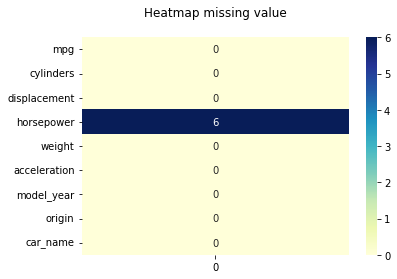

In [ ]:
# Check apakah ada data set yang "missing value" menggunakan visualisasi heatmap

# Hitung jumlah baris yang memiliki string "?" pada setiap kolom
missing_count = dataFrame.eq("?").sum().to_frame()

# Tampilkan heatmap
sns.heatmap(missing_count, cbar = True, annot = True,cmap = "YlGnBu")
plt.title("Heatmap missing value\n")
plt

In [ ]:
dataFrame.duplicated().value_counts()

False    398
dtype: int64

In [ ]:
drp = dataFrame.select_dtypes('object').columns.to_list()
drp

['horsepower', 'car_name']

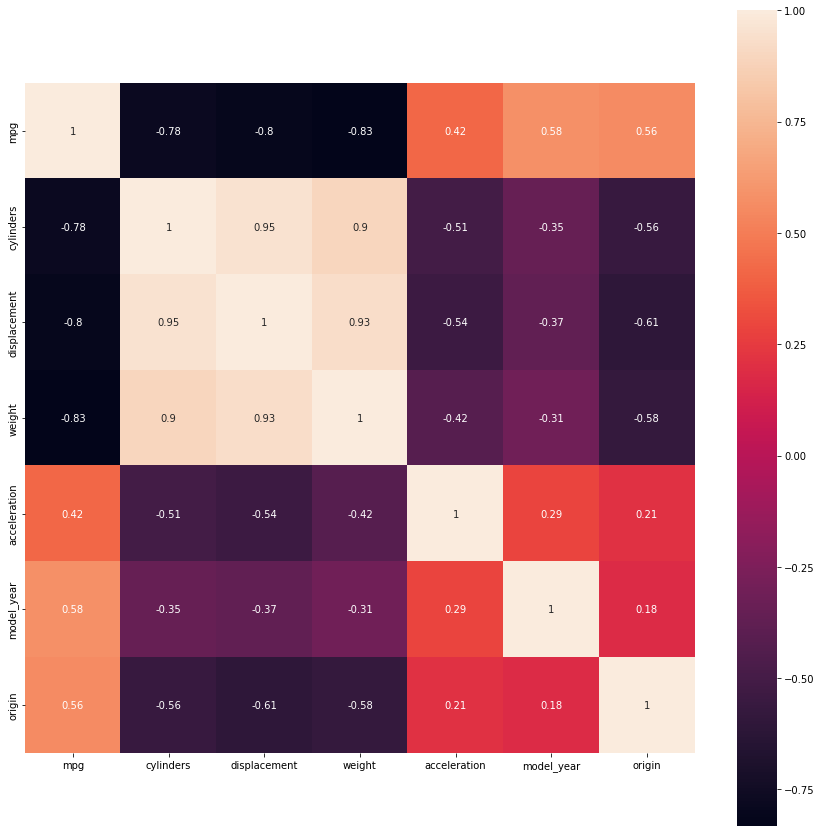

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dataFrame.corr(),annot=True,square=True)

In [ ]:
numCol = list(dataFrame.columns)
print(numCol)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']


In [ ]:
#Delete Column String
dataCopy = dataFrame.copy()
dataCopy.drop(columns = 'car_name', inplace=True)

In [ ]:
# Mencari nilai yang null / "?"
count=0
for i in range(0,398):
    for j in range(0,8):
        if (dataCopy.iloc[i,j]=='?'):
            count =count+1
print(count)
dataCopy = dataCopy.replace('?', np.NaN)

6


In [ ]:
# Melakukan inputer pada kolom kosong
inputer = KNNImputer()
dataCopy = pd.DataFrame(inputer.fit_transform(dataCopy), columns = dataCopy.columns)

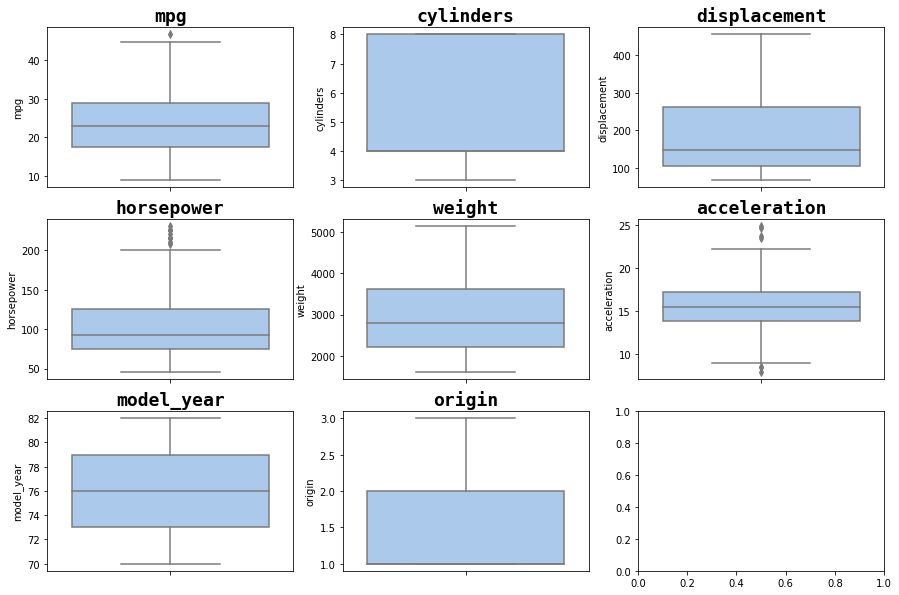

In [ ]:
# Menampilkan box plot beserta informasi outliersnya
# Mempersiapkan ukuran plot
n_cols = 3
n_rows = (len(dataCopy.columns) + n_cols - 1) // n_cols

# Buat plot
fig, ax = plt.subplots(n_rows, n_cols, figsize = (15, 10))

# Iterasi untuk setiap kolom pada data
for i, col in enumerate(dataCopy.columns):
    g = sns.boxplot(data = dataCopy, y = col, ax = ax[i // 3, i % 3], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

In [ ]:
# Melakukan penghapusan data pada outlier
cont=dataCopy.dtypes[(dataCopy.dtypes!='object')].index
def remove_outlier(col):
  sorted(col)
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range, upper_range

for column in dataCopy[cont].columns:
  lr,ur=remove_outlier(dataCopy[column])
  dataCopy[column]=np.where(dataCopy[column]>ur,ur,dataCopy[column])
  dataCopy[column]=np.where(dataCopy[column]<lr,lr,dataCopy[column])

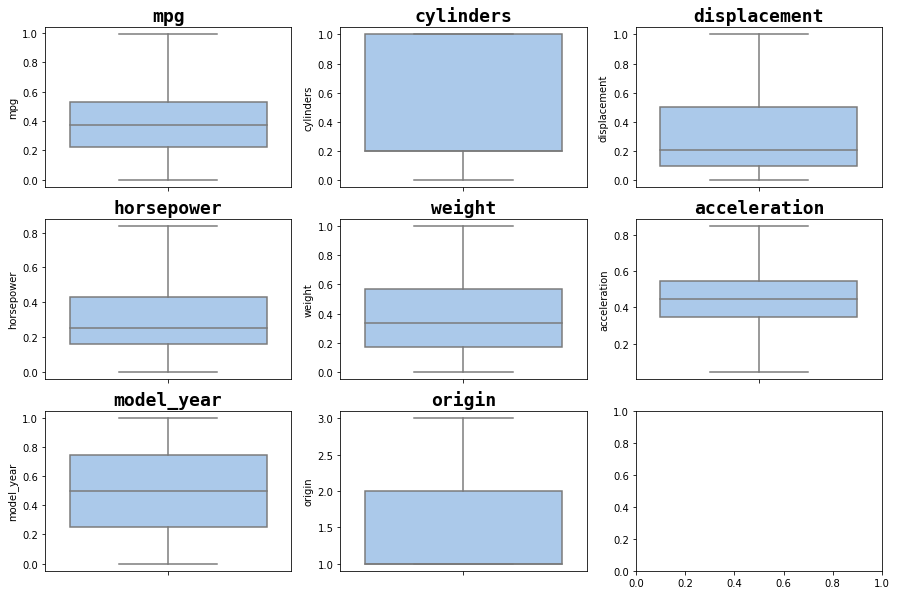

In [ ]:
# Menampilkan box plot beserta informasi outliersnya
# Mempersiapkan ukuran plot
n_cols = 3
n_rows = (len(dataCopy.columns) + n_cols - 1) // n_cols

# Buat plot
fig, ax = plt.subplots(n_rows, n_cols, figsize = (15, 10))

# Iterasi untuk setiap kolom pada data
for i, col in enumerate(dataCopy.columns):
    g = sns.boxplot(data = dataCopy, y = col, ax = ax[i // 3, i % 3], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

In [ ]:
# Melakukan scaller pada data
scaler = MinMaxScaler()
dataMinMax = dataCopy
dataMinMax.iloc[:,:-1]=scaler.fit_transform(dataMinMax.iloc[:,:-1].to_numpy())
dataMinMax

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,1.0
...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,1.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,2.0
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,1.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,1.0


In [ ]:
#Perintah untuk pembagian data antara data training dan data testing
x = dataMinMax.iloc[:, 0:-1]
y = dataMinMax.iloc[:, -1]

#Pada proses pembagiaanya, data tes digunakan sebanyak 20% dan data training sebanyak 80% dari keseluruhan data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Processing data

In [ ]:
# Model boosting dengan library adaboost

# Menginisialisasi sebuah model AdaBoostRegressor dengan menentukan jumlah estimator (atau base model) sebanyak 100.
# Nilai random_state diatur ke 0, yang berarti setiap kali Anda menjalankan kode ini, Anda akan mendapatkan hasil yang sama.
clf = AdaBoostRegressor(DecisionTreeClassifier(max_depth = 2))

# Melatih model
clf.fit(x_train, y_train)

# Menghitung akurasi model terhadap data latih
print("Score: ", clf.score(x_train, y_train))

# Mencetak hasil dari prediksi
y_pred = clf.predict(x_test)

Score:  0.8467839074921706


In [ ]:
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) )

MAE:  0.4155029266784719
MSE:  0.28536716390082056
RMSE:  0.5341976824180544


#Data experiment

In [ ]:
# Eksperiment 1
# Melakukan eksperiment dengan melakukan pemodelan GradientBoostingRegressor dan scaler yaitu StandardScaler
#Copy dataFrame
dataSet2 = dataFrame.copy()
dataSet2.drop(columns = 'car_name', inplace=True)
dataSet2 = dataSet2.replace('?', np.NaN)

# Melakukan inputer pada kolom kosong
inputer = KNNImputer()
dataSet2 = pd.DataFrame(inputer.fit_transform(dataSet2), columns = dataSet2.columns)

# Melakukan scaller pada data
scaler2 = StandardScaler()
dataStandardScaler = dataSet2.copy()
dataStandardScaler.iloc[:,:-1]=scaler2.fit_transform(dataStandardScaler.iloc[:,:-1].to_numpy())

#Perintah untuk pembagian data antara data training dan data testing
x2 = dataStandardScaler.iloc[:, 0:-1]
y2 = dataStandardScaler.iloc[:, -1]

#Pada proses pembagiaanya, data tes digunakan sebanyak 30% dan data training sebanyak 70% dari keseluruhan data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)

# Model boosting dengan library "GradientBoostingRegressor"

model_2 = GradientBoostingRegressor(n_estimators=50)
model_2.fit(x_train2, y_train2)
print("Hasil Score: ",model_2.score(x_train2, y_train2))
y_pred2 = model_2.predict(x_test2)
print('MAE : ', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE : ', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)) )

Hasil Score:  0.895520490885989
MAE :  0.26859064752133543
MSE :  0.16921307743820452
RMSE:  0.41135517188702575


In [ ]:
# Eksperiment 2
# Melakukan eksperiment dengan melakukan pemodelan AdaBoostRegressor dan scaler yaitu RobustScaler
#Copy dataFrame
dataSet3 = dataFrame.copy()
dataSet3.drop(columns = 'car_name', inplace=True)
dataSet3 = dataSet3.replace('?', np.NaN)

# Melakukan inputer pada kolom kosong
inputer = KNNImputer()
dataSet3 = pd.DataFrame(inputer.fit_transform(dataSet3), columns = dataSet3.columns)

# Melakukan scaller pada data
scaler3 = RobustScaler()
dataStandardScaler = dataSet3.copy()
dataStandardScaler.iloc[:,:-1]=scaler3.fit_transform(dataStandardScaler.iloc[:,:-1].to_numpy())

#Perintah untuk pembagian data antara data training dan data testing
x3 = dataStandardScaler.iloc[:, 0:-1]
y3 = dataStandardScaler.iloc[:, -1]

#Pada proses pembagiaanya, data tes digunakan sebanyak 30% dan data training sebanyak 70% dari keseluruhan data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=42)

# Model boosting dengan library "AdaBoostRegressor"

model_3 = AdaBoostRegressor(DecisionTreeClassifier(max_depth = 2))
model_3.fit(x_train3, y_train3)
model_3.score(x_train3, y_train3)

print("Hasil Score: ",model_3.score(x_train3, y_train3))
y_pred3 = model_3.predict(x_test3)
print('MAE : ', metrics.mean_absolute_error(y_test3, y_pred3))
print('MSE : ', metrics.mean_squared_error(y_test3, y_pred3))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)) )

Hasil Score:  0.8485991487988381
MAE :  0.225
MSE :  0.25833333333333336
RMSE:  0.5082650227325636


In [ ]:
# Eksperiment 3
# Classification

classificationModel_1 = AdaBoostClassifier(n_estimators=50)
classificationModel_1.fit(x_train, y_train)
classificationModel_1.score(x_train, y_train)

0.8836477987421384